## Making geometric data masks

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from extra_geom import AGIPD_1MGeometry

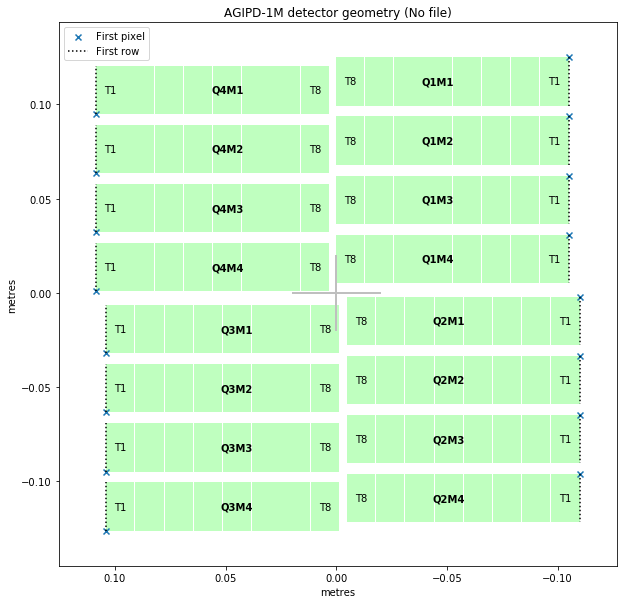

In [2]:
geom = AGIPD_1MGeometry.from_quad_positions(quad_pos=[
    (-525, 625),
    (-550, -10),
    (520, -160),
    (542.5, 475),
])

geom.inspect(axis_units='m')

In [3]:
pixpos = geom.get_pixel_positions()
px, py, pz = np.moveaxis(pixpos, -1, 0)  # Separate x, y, z coordinates
px.shape  # One coordinate per detector pixel

(16, 512, 128)

In [4]:
rect_mask = (0.01 < px) & (px < 0.05) & (-0.05 < py) & (py < -0.02)

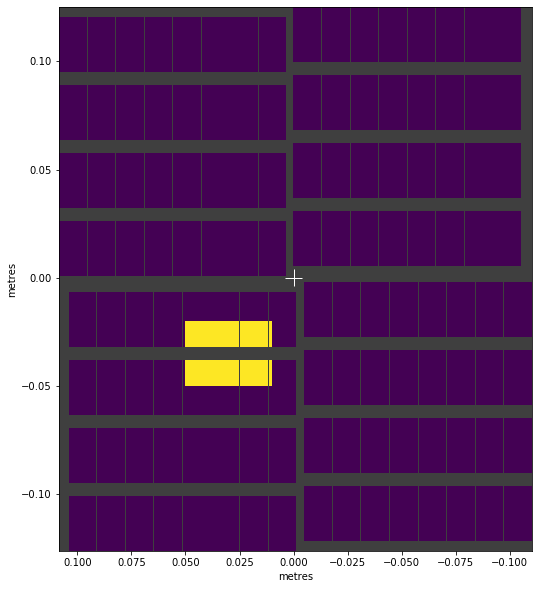

In [5]:
def visualise_mask(mask_arr):
    geom.plot_data_fast(
        # convert to float to distinguish gaps as NaN
        mask_arr.astype(float), colorbar=None, axis_units='m'
    )

visualise_mask(rect_mask)

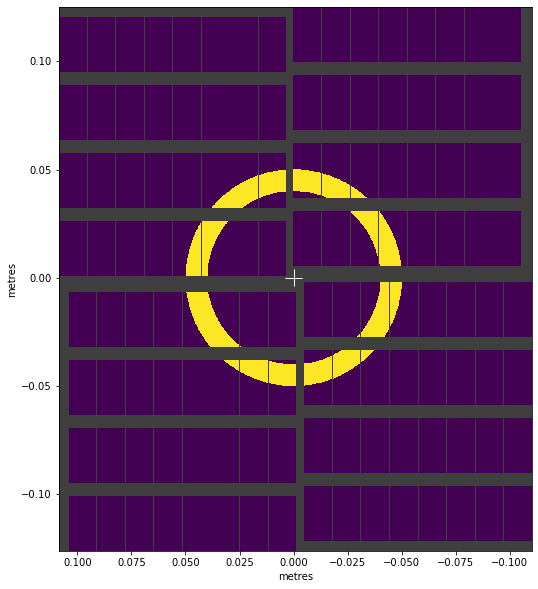

In [6]:
radius = np.sqrt(px**2 + py**2)

ring_mask = (0.04 < radius) & (radius < 0.05)
visualise_mask(ring_mask)

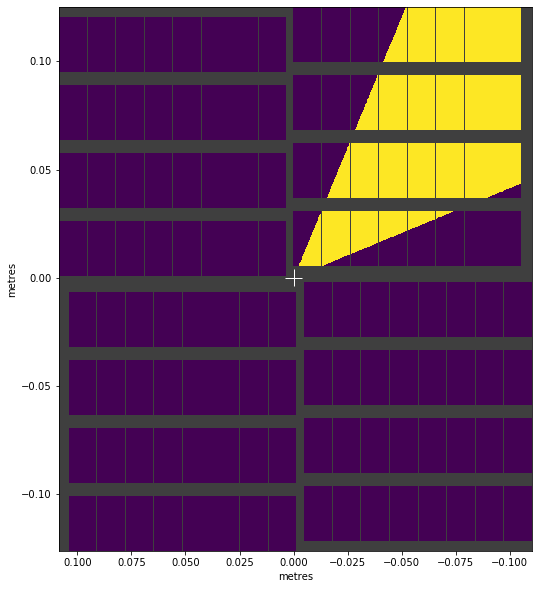

In [7]:
angle = np.arctan2(py, px)

wedge_mask = (np.pi * 5/8 < angle) & (angle < np.pi * 7/8)
visualise_mask(wedge_mask)

Use `&` and `|` to combine masks:

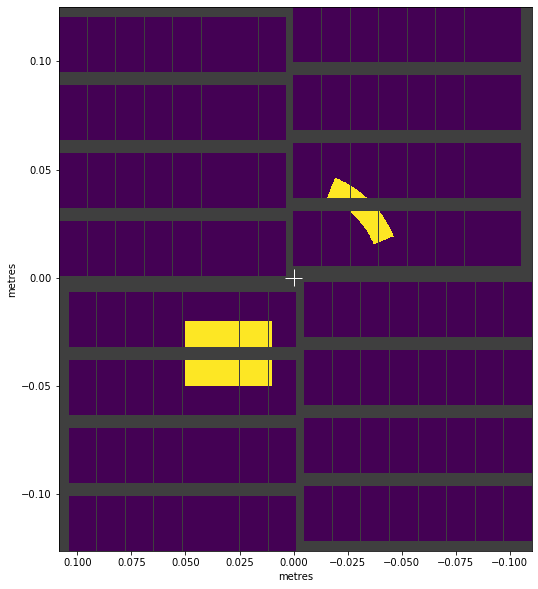

In [8]:
complex_mask = (ring_mask & wedge_mask) | rect_mask
visualise_mask(complex_mask)

Which modules does the mask include? With this information, you could skip loading data for the other modules.

In [9]:
module_has_data = np.any(complex_mask, axis=(1, 2))
module_has_data.nonzero()[0]

array([2, 3, 8, 9])